In [1]:
import pandas as pd
import re, numpy, os, sys
import matplotlib.pyplot as plt

# Import data

In [8]:
with open('/home/pggo/OpenFOAM/pggo-10/run/airFoil2D/airFoil2D/Test_Plot/faces.csv', 'r') as nfaces:
    nfaces = nfaces.read()

with open('/home/pggo/OpenFOAM/pggo-10/run/airFoil2D/airFoil2D/Test_Plot/points.csv', 'r') as fpoints:
    points = fpoints.read()

with open('/home/pggo/OpenFOAM/pggo-10/run/airFoil2D/airFoil2D/Test_Plot/wallShearStress.csv', 'r') as Stress:
    tau = Stress.read()

with open('points.csv', 'r') as database_points:
    d_points = database_points.read()

dref = pd.read_csv('/home/pggo/OpenFOAM/pggo-10/run/airFoil2D/airFoil2D/Test_Plot/Reference ShearStress..csv')

# Faces database processing

In [9]:
nFaces = 817
startFace = 348302
endFaces = startFace + nFaces
faces_total = []
faces = []

for item in re.finditer('\([\w ]*\)', nfaces):
    face_temp = item[0]
    faces_total.append(int(re.findall('[\w]*', face_temp)[1]))

faces = faces_total[startFace:endFaces]
    
# print(faces_x)


# Points database processing 
for x coordinate

In [4]:
x_cord_total = []
y_cord_total = []
for item in re.finditer('\(.*\)', points):
    cord_n = item[0]
    cord_temp = re.split('[\(\)]', cord_n)[1]
    x_cord_total.append(float(re.split('[\ ]', cord_temp)[0]))
    y_cord_total.append(float(re.split('[\ ]', cord_temp)[1]))

airfoil_xcord = []
airfoil_ycord = []
for index in faces:
    airfoil_xcord.append(x_cord_total[index])
    airfoil_ycord.append(y_cord_total[index])

#print(cord_temp)
# print(airfoil_xcord)
# print(airfoil_ycord)


# Construct DataFrame for x and y coordinate

In [5]:
airfoil = pd.DataFrame(airfoil_xcord, columns={'x'})
airfoil['y'] = airfoil_ycord
airfoil

,x,y
0,0.967815,0.005688
1,0.393128,0.058279
2,0.390630,0.058366
3,0.995050,0.001952
4,1.000000,0.001260
...,...,...
812,0.990099,-0.002641
813,0.992575,-0.002297
814,0.995050,-0.001952
815,0.997525,-0.001607


# ShearStress database processing

In [52]:
tau_x = []
tau_y = []
for item in re.finditer('\(.*\)', tau):
    tau_n = item[0]
    x_tau_digit = re.split('[\(\)]', tau_n)[1]
    tau_x.append(float(re.split('[\ ]', x_tau_digit)[0]))
    tau_y.append(float(re.split('[\ ]', x_tau_digit)[1]))

#print('tua is : ', x_tau_digit)
Tau = pd.DataFrame(tau_x, columns=['x'])
Tau['y'] = tau_y
Tau['All'] = numpy.sqrt(numpy.square(Tau['x']) + numpy.square(Tau['y']))

# Processing

Classify the points into the upper and bottom parts

In [7]:
airfoil['Shear Stress'] = Tau
airfoil = airfoil[airfoil['y'] > 0]
airfoil['Shear Stress'] = airfoil['Shear Stress'] * -1
airfoil = airfoil.sort_values('x')


/tmp/ipykernel_545/4255641986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airfoil['Shear Stress'] = airfoil['Shear Stress'] * -1


Dynamic Pressure

In [8]:
q = 0.5 * 1 * numpy.square(25.75)

Convert shear stress to coefficient

In [9]:
airfoil['Shear Stress'] = airfoil['Shear Stress'] / q
airfoil

,x,y,Shear Stress
450,0.000198,0.002489,0.001089
449,0.000780,0.004917,0.002541
448,0.001709,0.007234,0.003998
447,0.002927,0.009415,0.005202
446,0.004376,0.011450,0.006117
...,...,...,...
5,0.990099,0.002641,0.001796
6,0.992575,0.002297,0.001830
3,0.995050,0.001952,0.001786
14,0.997525,0.001607,0.005621


# Plot diagram

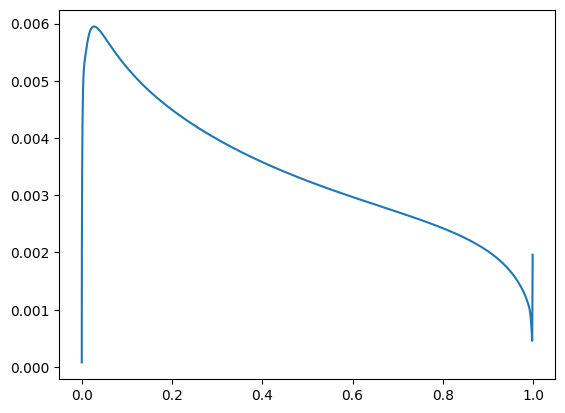

In [10]:
plt.plot(dref['x'], dref[' shear stress'])

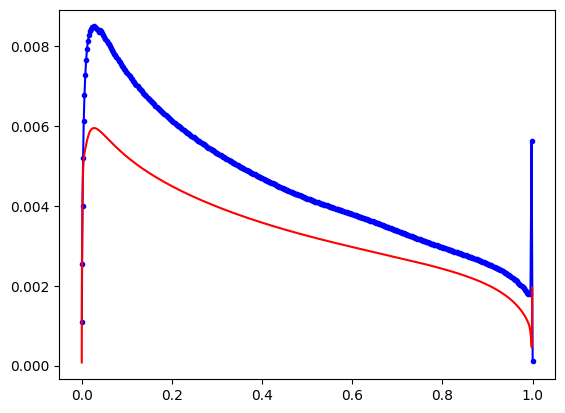

In [27]:
plt.plot(airfoil['x'],airfoil['Shear Stress'], 'b-o',ms=3 , label='Plot 1')
plt.plot(dref['x'], dref[' shear stress'], color= 'red', label='Plot 2')
plt.show()